# Assignment 30 - Data Science Masters

## 3D Chart with Color for each data point with specific Class

### In this assignment students have to transform iris data into 3 dimensions and plot a 3d  chart with transformed dimensions and color each data point with specific class

## Load libraries

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [0]:
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

##  Understanding the Dataset and Data

In [0]:
iris_dict = datasets.load_iris() # Bunch object

In [4]:
iris_dict.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(iris_dict.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [0]:
iris_features = iris_dict.feature_names

In [0]:
iris_classes = iris_dict.target_names

In [16]:
iris = pd.DataFrame(data=iris_dict.data, columns=iris_features)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
iris_target = iris_dict.target

In [0]:
iris['class'] = iris_target

# # Basic Information

In [27]:
iris.shape

(150, 5)

In [28]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
class                150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


_The dataset has no null or NaN values_

## Basic Statistical Information

In [29]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [30]:
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


## Explore Data

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 1440x1440 with 0 Axes>

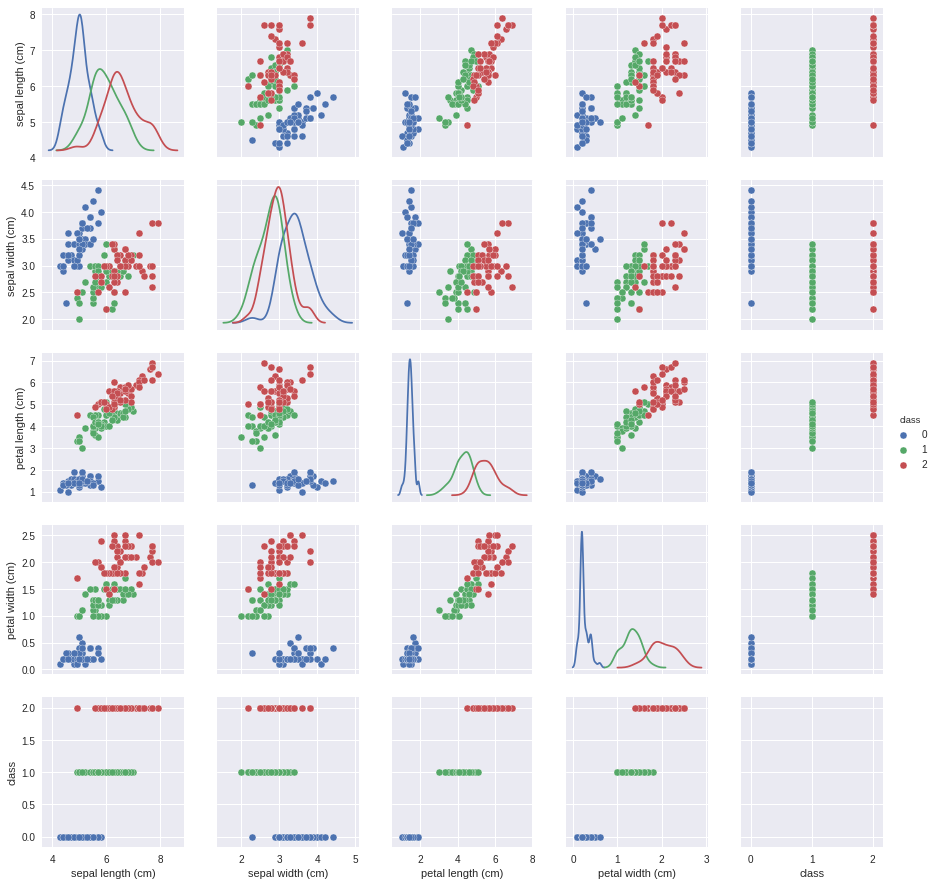

In [31]:
plt.figure(figsize =(20,20))
sns.pairplot(data= iris, hue='class',kind='scatter',diag_kind='kde')

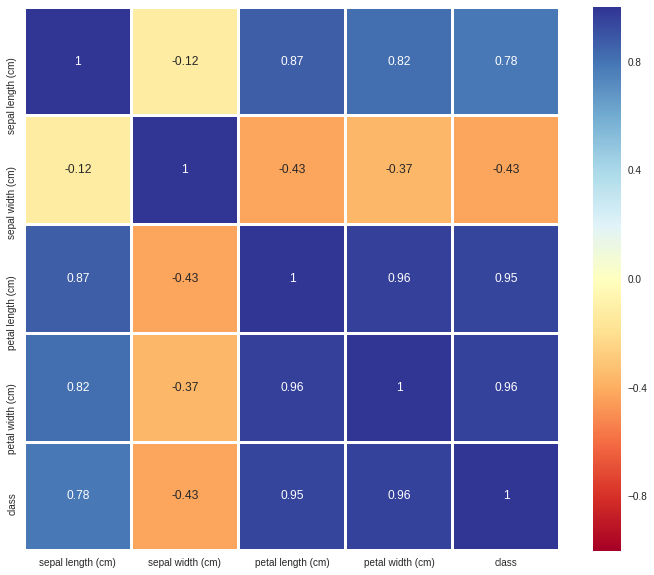

In [32]:
plt.figure(figsize = (12,10))
sns.heatmap(iris.corr(), annot= True, linewidth = '2',cmap ='RdYlBu')

## Separate features from Target

In [0]:
X = iris.drop(columns ='class')
Y = iris['class']

## Apply PCA to the dataset

In [0]:
pca = decomposition.PCA(n_components=3)
X_pca = pca.fit_transform(X)

## Plot the 3-D chart

## Front View

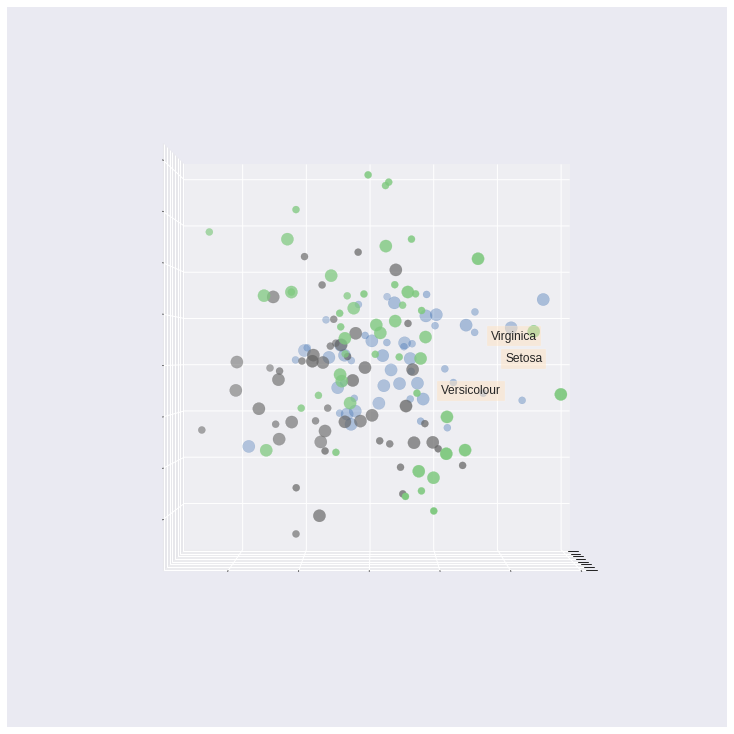

In [35]:
# Define figure size
fig = plt.figure(1, figsize=(10, 10))
plt.clf()

# Define axis size, elevation and azimuth
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=0, azim=0)
plt.cla()

# Define the location of the labels of each species of Iris
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X_pca[Y == label, 0].mean(), X_pca[Y == label, 1].mean()+ 1, X_pca[Y == label, 2].mean(), 
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='bisque'))
    
    
# Change the order of labels, so that they match
y_color = np.choose(Y, [1, 2, 0]).astype(np.float)

# Plot the scatter plot
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_color, 
           cmap='Accent', s=(50, 150))

# Show ticks on each of the axes
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

## Top View

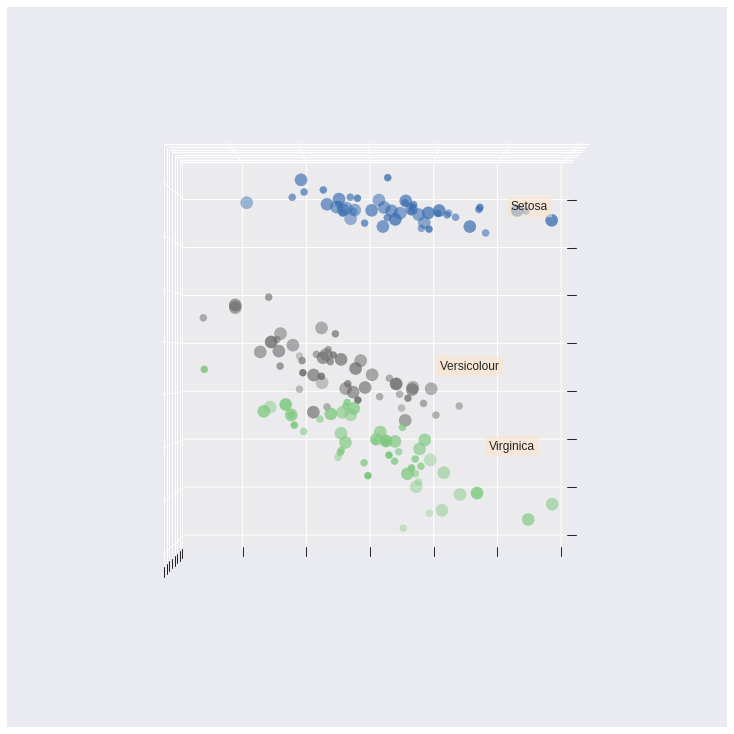

In [36]:
# Define figure size
fig = plt.figure(1, figsize=(10, 10))
plt.clf()

# Define axis size, elevation and azimuth
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=90, azim=0)
plt.cla()

# Define the location of the labels of each species of Iris
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X_pca[Y == label, 0].mean(), X_pca[Y == label, 1].mean()+ 1, X_pca[Y == label, 2].mean(), 
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='bisque'))
    
    
# Change the order of labels, so that they match
y_color = np.choose(Y, [1, 2, 0]).astype(np.float)

# Plot the scatter plot
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_color, 
           cmap='Accent', s=(50, 150))

# Show ticks on each of the axes
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

## Right - Profile - View

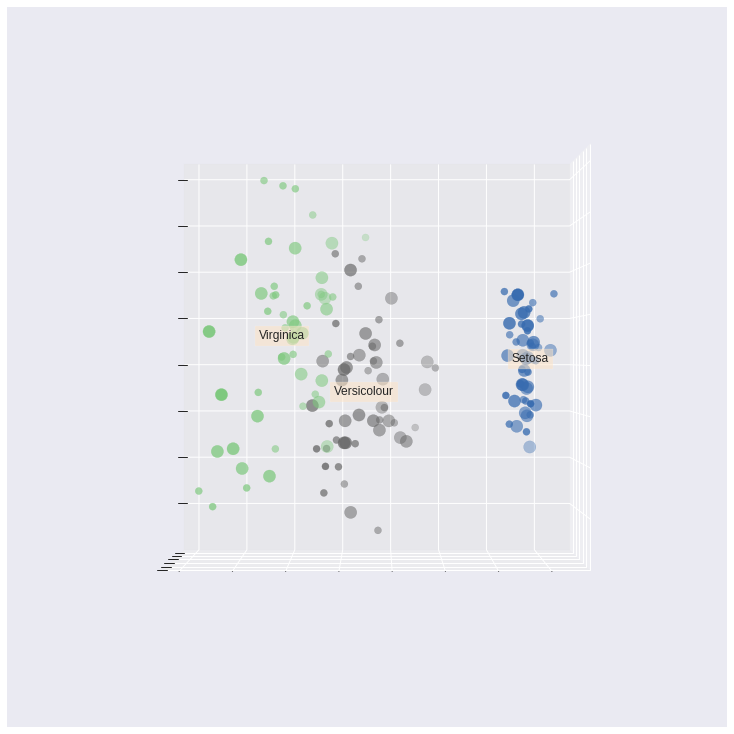

In [37]:
# Define figure size
fig = plt.figure(1, figsize=(10, 10))
plt.clf()

# Define axis size, elevation and azimuth
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=0, azim=90)
plt.cla()

# Define the location of the labels of each species of Iris
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X_pca[Y == label, 0].mean(), X_pca[Y == label, 1].mean()+ 1, X_pca[Y == label, 2].mean(), 
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='bisque'))
    
    
# Change the order of labels, so that they match
y_color = np.choose(Y, [1, 2, 0]).astype(np.float)

# Plot the scatter plot
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_color, 
           cmap='Accent', s=(50, 150))

# Show ticks on each of the axes
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

## 3D Plot- Scatterplot of the Iris classes

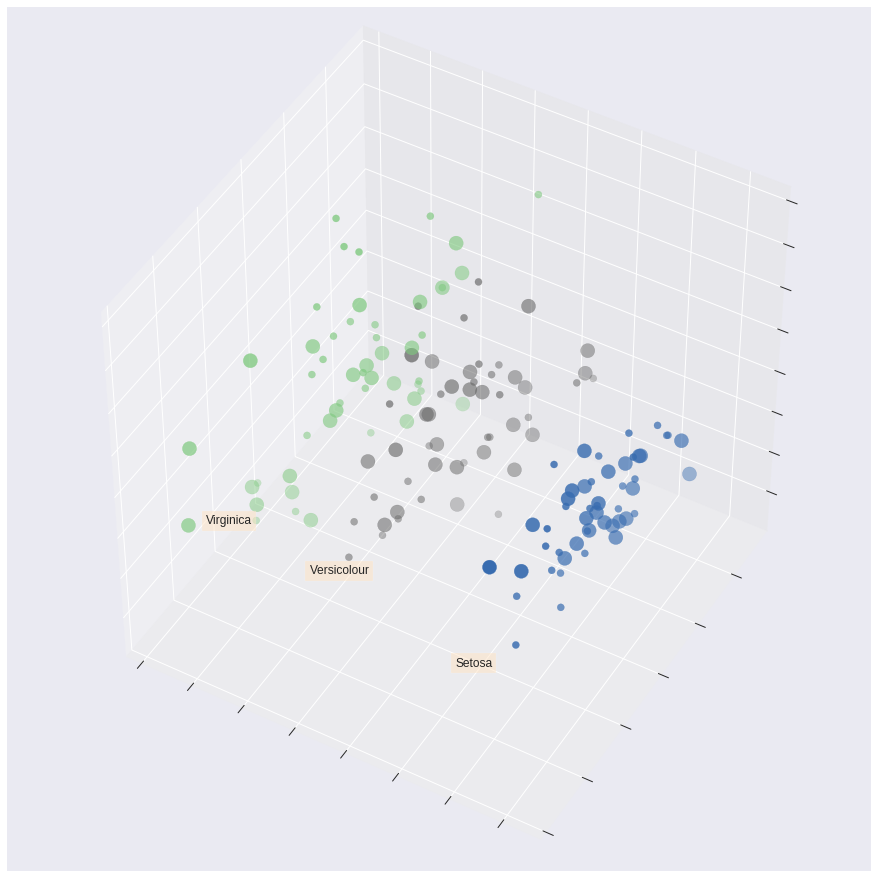

In [38]:
# Define figure size
fig = plt.figure(1, figsize=(6, 6))
plt.clf()

# Define axis size, elevation and azimuth
ax = Axes3D(fig, rect=[0, 0, 2, 2], elev=45, azim=120)
plt.cla()

# Define the location of the labels of each species of Iris
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X_pca[Y == label, 0].mean(), X_pca[Y == label, 1].mean() + 1.5 ,X_pca[Y == label, 2].mean(), 
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='bisque'))
    
    
# Change the order of labels, so that they match
y_color = np.choose(Y, [1, 2, 0]).astype(np.float)

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_color, 
           cmap='Accent', s=(50, 200))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()